<a href="https://colab.research.google.com/github/pabmena/33-js-concepts/blob/master/Copia_de_TP2_CEIA_IIA_Menardi_Werner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:
* Pablo Menardi
* Nicolás Werner

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

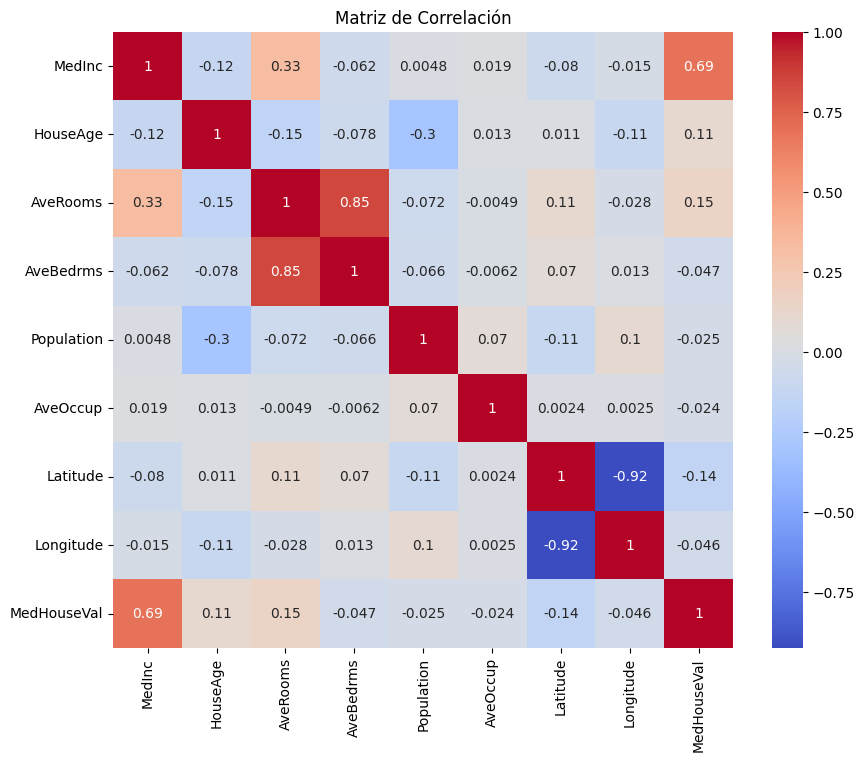

In [ ]:
# Cargar el dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Ahora calculamos la matriz de correlacion
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Generamos el mapa de calor en base a los resultados de la matriz de correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

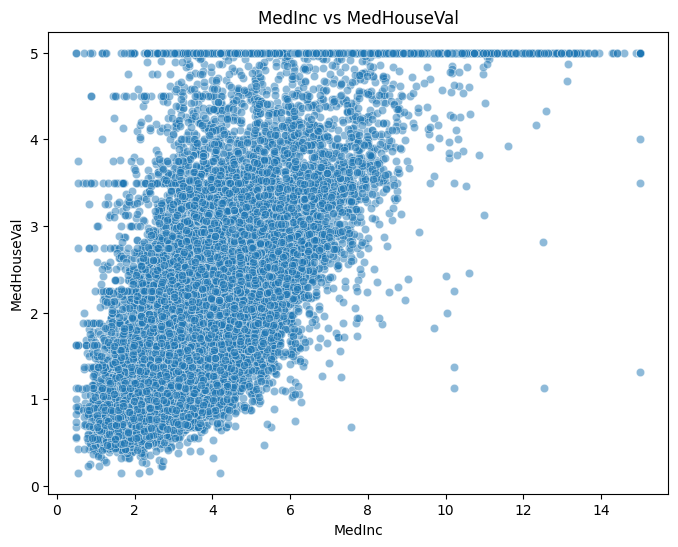

In [ ]:
# En base a lo anterior, podemos ver que hay una mayor correlacion (0.69) entre MedHouseVal y MedInc
# Ahora graficamos estos datos para comparar
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='MedInc', y='MedHouseVal', alpha=0.5)
plt.title('MedInc vs MedHouseVal')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.show()

Podemos ver que a medida que aumenta el ingreso, tmb aumenta el valor de las casas

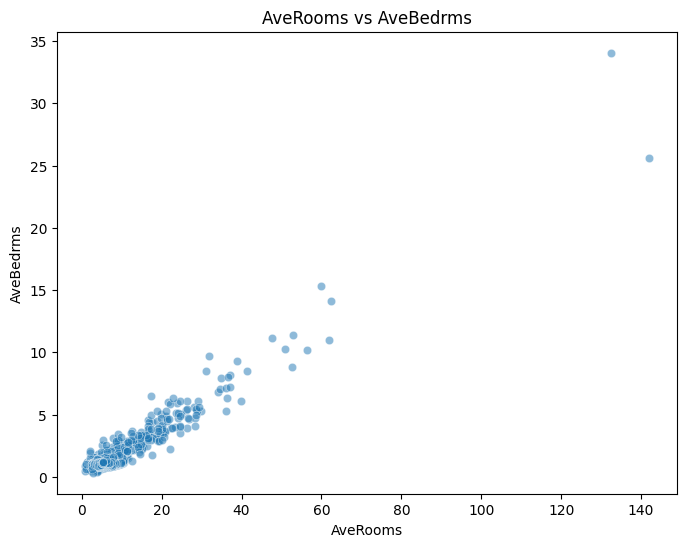

In [ ]:
# Ademas de lo anterior, pudimos identificar que los atributos con mayor correlacion entre si
# son AveRooms y AveBedrms con una correlacion de +0.85
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='AveRooms', y='AveBedrms', alpha=0.5)
plt.title('AveRooms vs AveBedrms')
plt.xlabel('AveRooms')
plt.ylabel('AveBedrms')
plt.show()

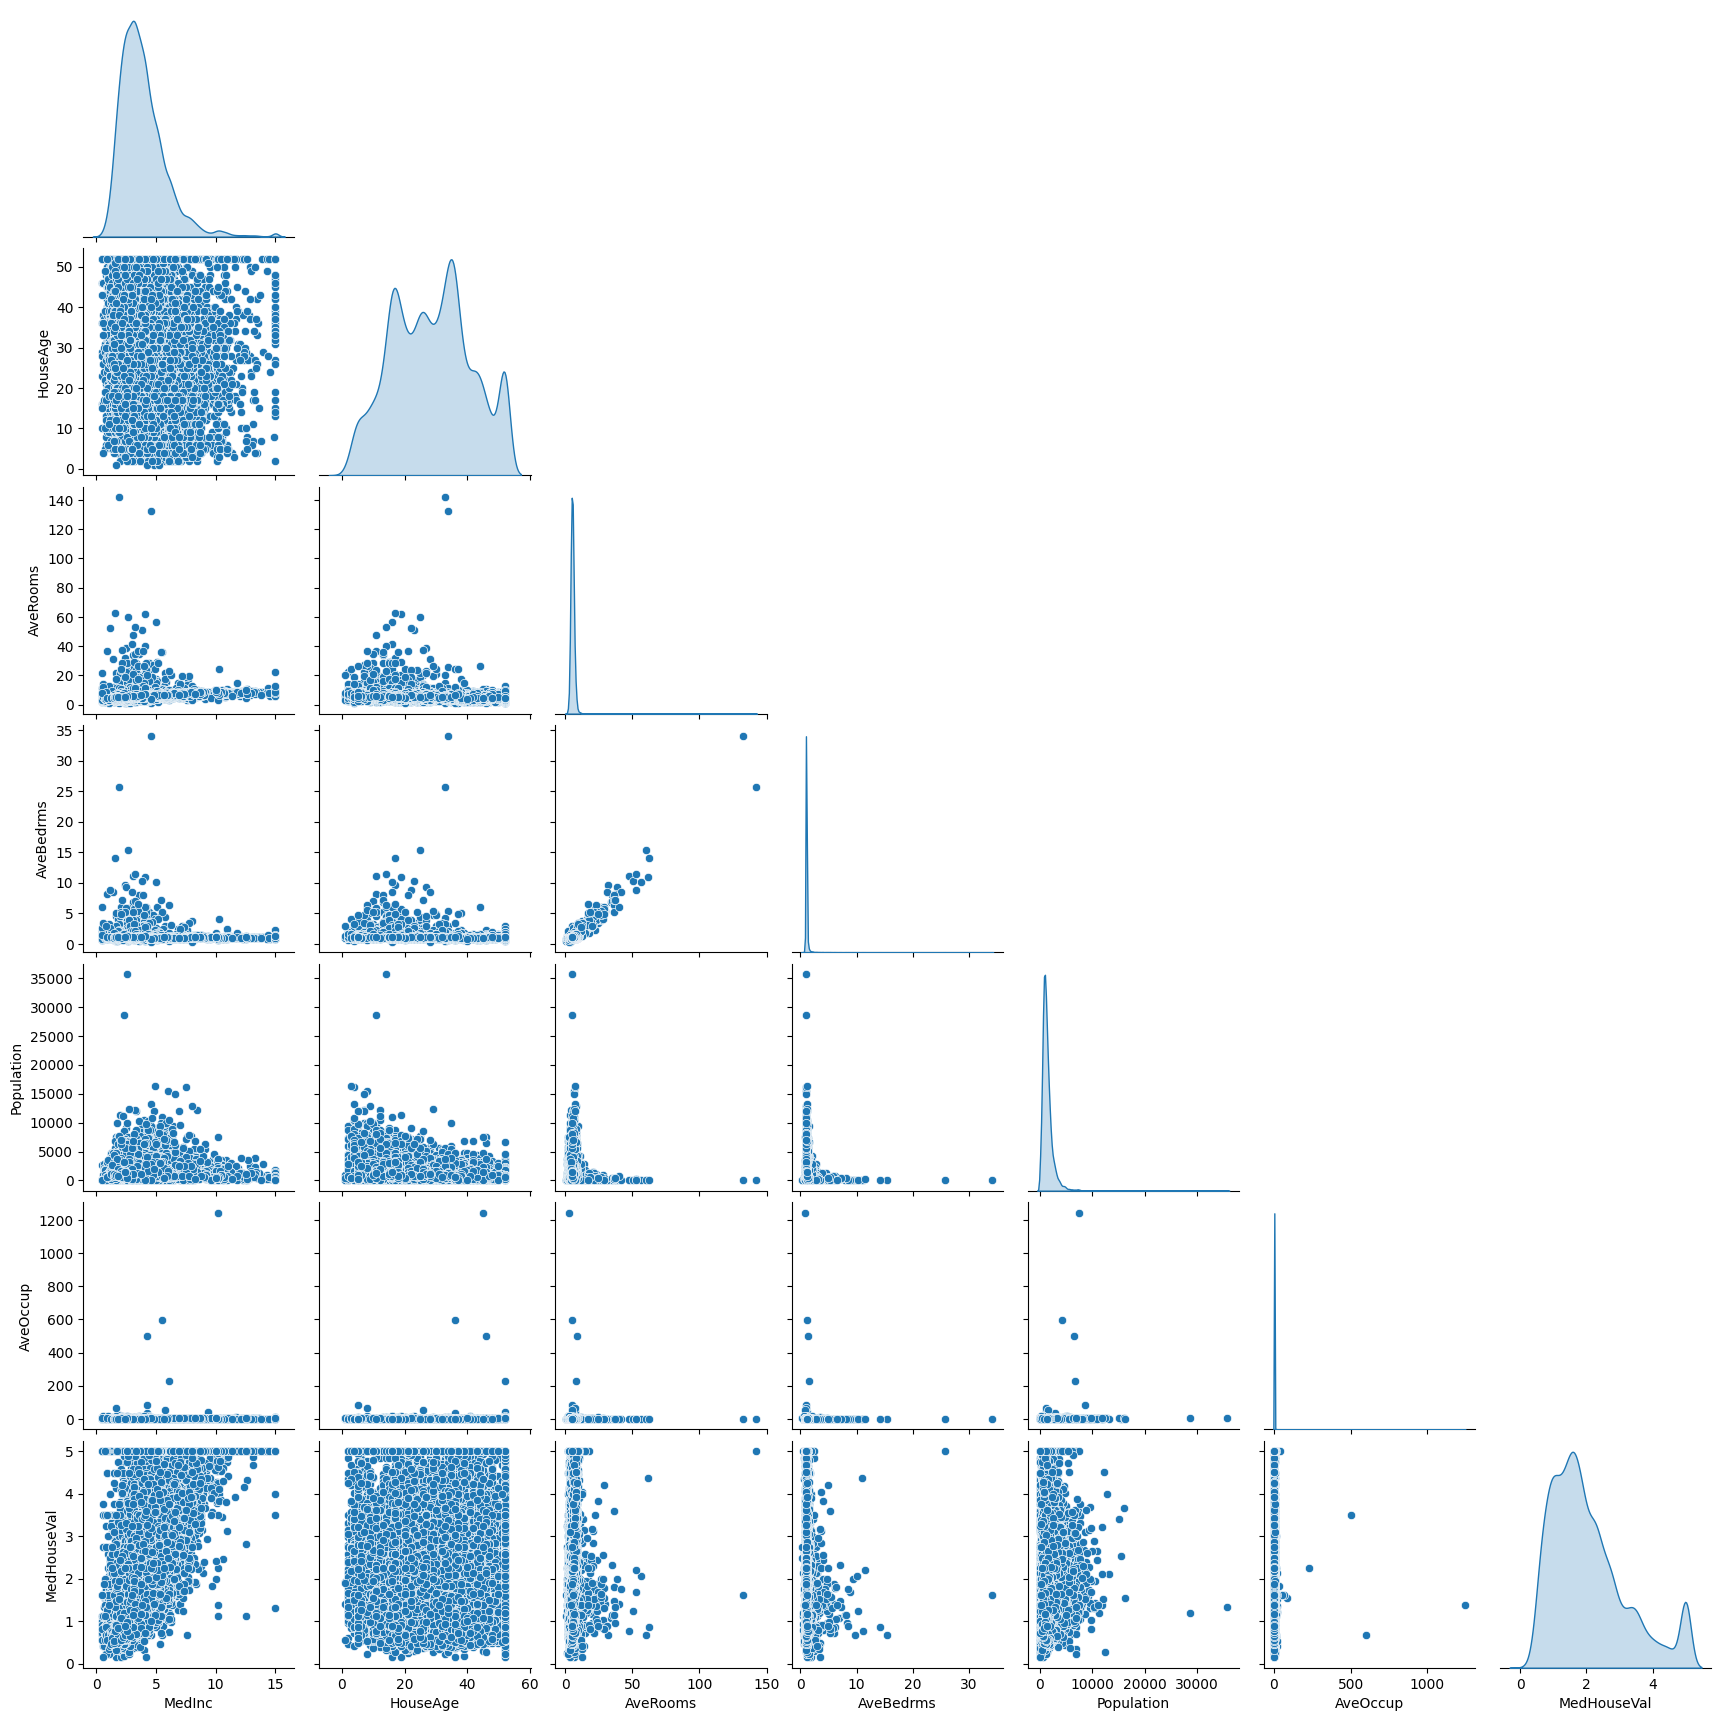

In [ ]:
# Para dejarlo un poco mas visual, utilizamos pairplot, una libreria que ayuda a poder visualizar
# de manera muy amigable los distintos promedios entre cada dato contra el resto
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']],
             diag_kind='kde', corner=True)
plt.show()

2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

<ipython-input-7-943c63908a8e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


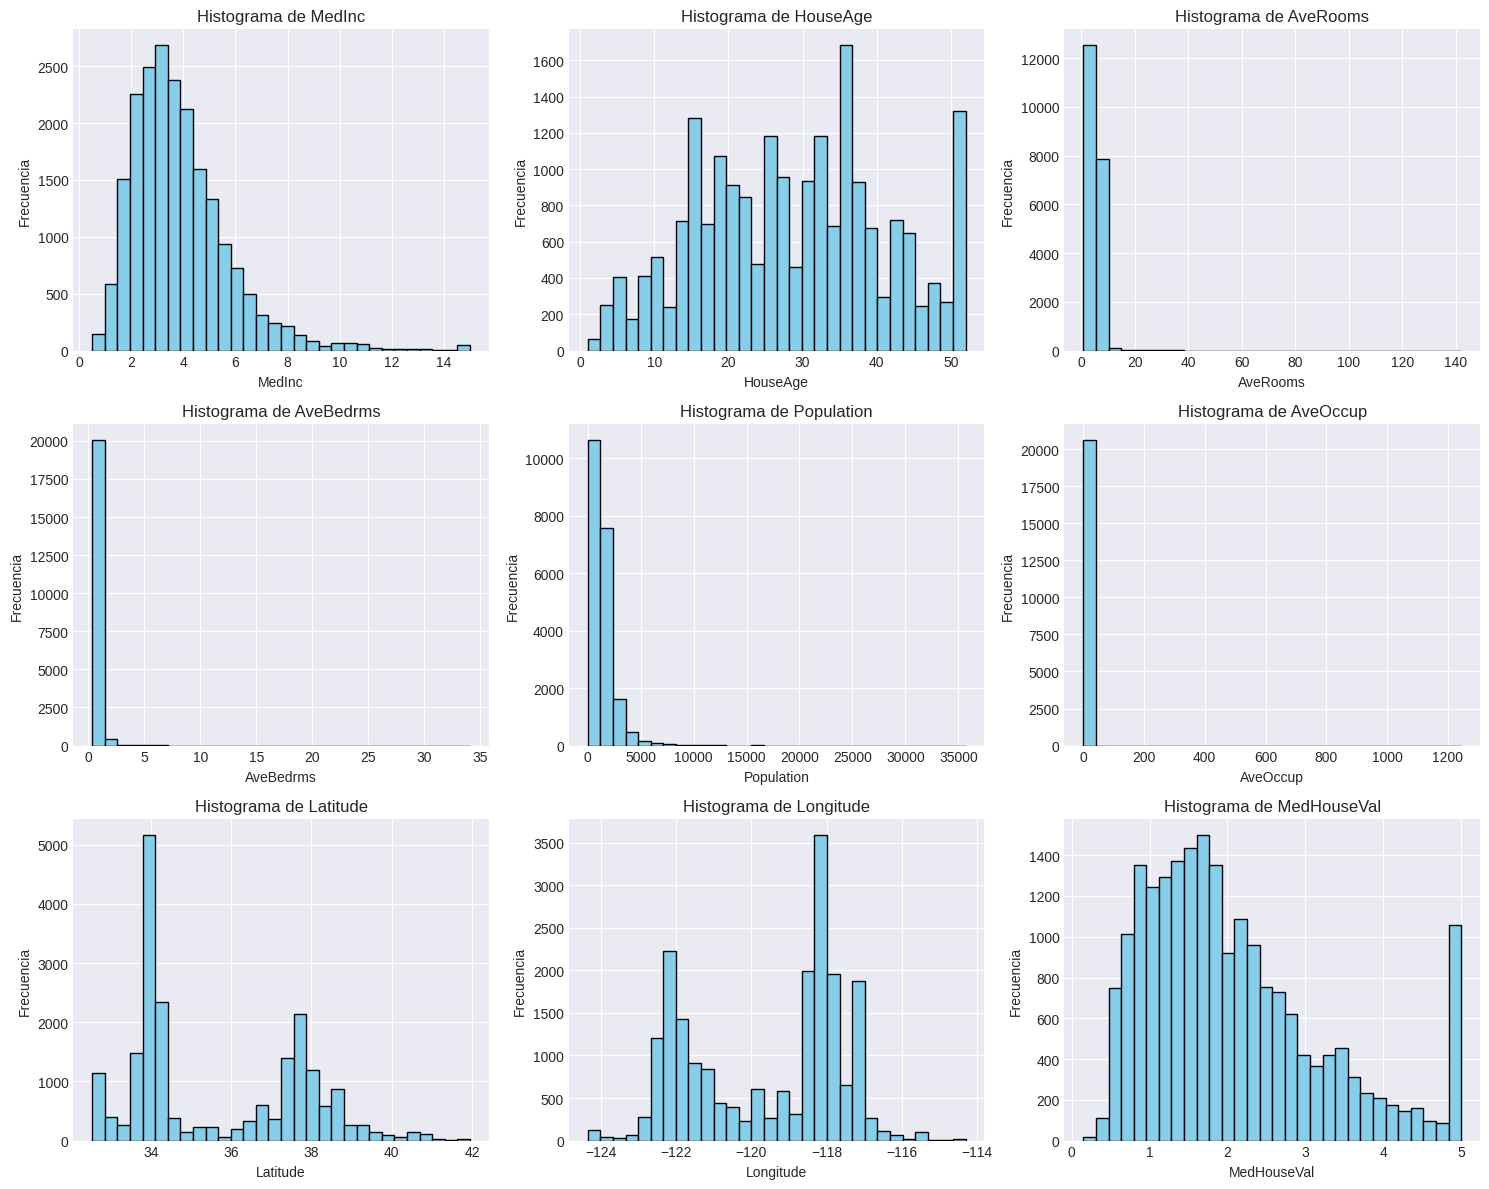

In [ ]:
plt.style.use('seaborn-darkgrid')

# Aca generamos la figura para cada variable
df_columns = df.columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Aplanamos la matriz para hacer mas facil la iteracion
axes = axes.flatten()

# Graficar histogramas para cada variable y el target (MedHouseVal)
for i, col in enumerate(df_columns):
    axes[i].hist(df[col], bins=30, edgecolor='black', color='skyblue')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

La mayoria muestra un tipo de sesgo positivo, por lo que podemos ver que ninguna variable muestra una distribucion en forma de campana, por lo que no podemos ver que los datos vengan de una distribucion Gaussiana.

3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [ ]:
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target
# Primero dividimos los datos en datos de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
# Entrenamos al modelo con los datos de entrenamiento
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_train_mean = np.mean(y_train)

# Calculamos la varianza total
total_var = np.sum((y_train - y_train_mean) ** 2)

# CalCalculamoscular la varianza explicada por el modelo
explained_var = np.sum((y_train_prediction - y_train_mean) ** 2)

# Calculamos la varianza residual
residual_var = np.sum((y_train - y_train_prediction) ** 2)

# Calculamos R^2
R_squared = model.score(X_train, y_train)

print(f"Varianza total: {total_var:.2f}")
print(f"Varianza explicada por el modelo: {explained_var:.2f}")
print(f"Varianza residual: {residual_var:.2f}")
print(f"Coeficiente de determinación (R^2): {R_squared:.4f}")


Varianza total: 22072.88
Varianza explicada por el modelo: 13520.77
Varianza residual: 8552.11
Coeficiente de determinación (R^2): 0.6126


¿El modelo está capturando el comportamiento del target?
Podemos ver en base al R^2 que el modelo esta capturando ~61,26% de la varianza total. Por lo que esta capturando la mayoria del comportamiento del target, aunque aun deja ~39% sin explicar. Ademas la varianza residual se puede considerar como relativamente alta, por lo que se puede interpretar como que hay factores importantes que el modelo no esta considerando

4. Calcular las métricas de MSE, MAE y R2 del set de evaluación.

In [ ]:
# Predicciones del modelo en el conjunto de prueba
y_test_pred = model.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_test_pred)

# AE
mae = mean_absolute_error(y_test, y_test_pred)

# R^2
r2 = r2_score(y_test, y_test_pred)

print(f"MSE en el conjunto de prueba: {mse:.4f}")
print(f"MAE en el conjunto de prueba: {mae:.4f}")
print(f"R^2 en el conjunto de prueba: {r2:.4f}")

MSE en el conjunto de prueba: 0.5559
MAE en el conjunto de prueba: 0.5332
R^2 en el conjunto de prueba: 0.5758


A partir de estos resultados podemos ver cierta consistencia con el conjunto de entrenamiento que usamos en el punto anterior ya que el R^2 antes dio ~61% y ahora dio ~57%

5. Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de α, buscando entre [0, 12.5]. Graficar el valor de MSE versus α

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler  # Importar StandardScaler

# Cargar el dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir los valores de α
alphas = np.linspace(0, 12.5, 50)
print("Valores de α a probar:", alphas)

# Configurar la validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Lista para almacenar los MSE para cada α
mse_values = []

# Iterar sobre los valores de α
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    # Usamos X_scaled en lugar de X
    mse = -cross_val_score(ridge, X_scaled, y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse_values.append(mse)


Valores de α a probar: [ 0.          0.25510204  0.51020408  0.76530612  1.02040816  1.2755102
  1.53061224  1.78571429  2.04081633  2.29591837  2.55102041  2.80612245
  3.06122449  3.31632653  3.57142857  3.82653061  4.08163265  4.33673469
  4.59183673  4.84693878  5.10204082  5.35714286  5.6122449   5.86734694
  6.12244898  6.37755102  6.63265306  6.8877551   7.14285714  7.39795918
  7.65306122  7.90816327  8.16326531  8.41836735  8.67346939  8.92857143
  9.18367347  9.43877551  9.69387755  9.94897959 10.20408163 10.45918367
 10.71428571 10.96938776 11.2244898  11.47959184 11.73469388 11.98979592
 12.24489796 12.5       ]


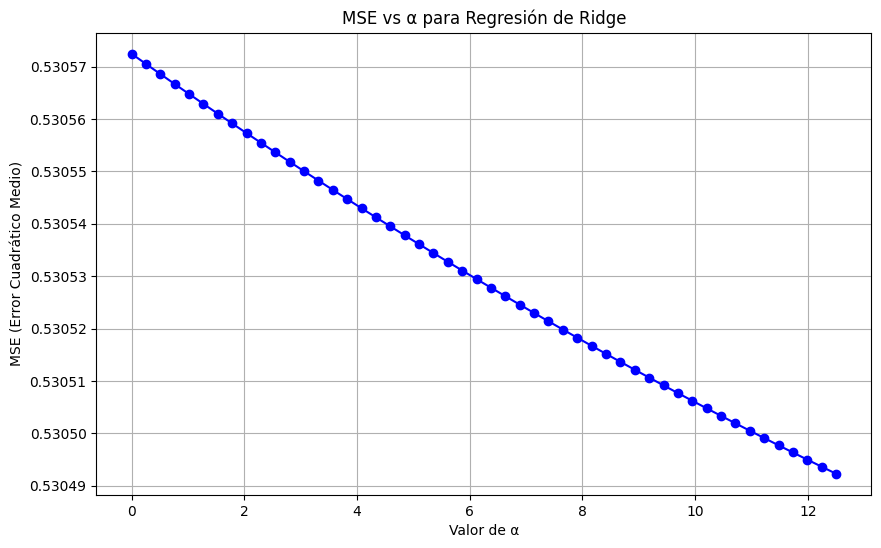

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Valor de α')
plt.ylabel('MSE (Error Cuadrático Medio)')
plt.title('MSE vs α para Regresión de Ridge')
plt.grid(True)
plt.show()

In [ ]:
# Encontrar el índice del MSE mínimo
min_mse_index = np.argmin(mse_values)
# Obtener el mejor α y el MSE mínimo
best_alpha = alphas[min_mse_index]
min_mse = mse_values[min_mse_index]

print(f"El mejor valor de α es: {best_alpha:.4f}, con un MSE de: {min_mse:.6f}")

El mejor valor de α es: 12.5000, con un MSE de: 0.530492


6. Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Entrenar el modelo de regresión Ridge con α = 12.5
ridge_model = Ridge(alpha=12.50)
ridge_model.fit(X_train_scaled, y_train)

# Predicciones del modelo de regresión lineal
y_pred_linear = linear_model.predict(X_test_scaled)

# Predicciones del modelo de regresión Ridge
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calcular MSE y MAE para la regresión lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Calcular MSE y MAE para la regresión Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"Regresión Lineal - MSE: {mse_linear:.6f}, MAE: {mae_linear:.6f}")
print(f"Regresión Ridge (α={best_alpha:.4f}) - MSE: {mse_ridge:.6f}, MAE: {mae_ridge:.6f}")

Regresión Lineal - MSE: 0.555892, MAE: 0.533200
Regresión Ridge (α=12.5000) - MSE: 0.555405, MAE: 0.533128


**Comparación de MSE:**

Regresión *Lineal MSE: 0.555892*
Regresión *Ridge MSE: 0.555405
El modelo de regresión Ridge tiene un MSE ligeramente menor que el de la regresión lineal.

**Comparación de MAE:**

Regresión *Lineal MAE: 0.533200*
Regresión *Ridge MAE: 0.533128*
El modelo de regresión Ridge también presenta un MAE ligeramente menor.

Respuestas a las preguntas
**¿Cuál da mejores resultados (usando MSE y MAE)?**

La regresión Ridge con α=12.5 ofrece resultados ligeramente mejores que la regresión lineal estándar, ya que tiene valores menores tanto en MSE como en MAE.

**Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?**

***Conjetura:***
La mejora, aunque pequeña, se debe a la regularización que introduce la regresión Ridge. Al penalizar la magnitud de los coeficientes, Ridge reduce el impacto de variables que pueden estar introduciendo ruido o que están altamente correlacionadas con otras variables. Esto ayuda a simplificar el modelo y mejorar su capacidad de generalización.

***Error reducido:***

Se ha reducido el error debido a la varianza del modelo. La regresión Ridge disminuye la varianza al evitar que los coeficientes tomen valores excesivamente grandes, lo que puede ocurrir en presencia de multicolinealidad o cuando el modelo está sobreajustado. Al controlar la varianza, el modelo se vuelve más robusto frente a nuevos datos, mejorando ligeramente las métricas de rendimiento en el conjunto de prueba.

**Ampliación del Rango de α: Resultados Adicionales**

*Dado que los resultados obtenidos dentro del rango [0, 12.5] no mostraron una mejora significativa, se decidió ampliar el rango de α para evaluar si un α más alto podría mejorar el rendimiento del modelo.*

***Rango Ampliado de α: [0, 50]***

*Al ampliar el rango de α hasta 50, se observó un comportamiento más típico en la regresión de Ridge, donde el MSE inicialmente disminuye hasta alcanzar un mínimo, y luego comienza a aumentar nuevamente debido a la introducción de demasiado sesgo.*

***Nuevo Mejor Valor de α: α ≈ 42.42***

El valor de α óptimo resultó ser α ≈ 42.42, con los siguientes resultados:

Regresión Lineal:

MSE: 0.555892
MAE: 0.533200
Regresión Ridge (α = 42.42):

MSE: 0.554397
MAE: 0.533031 *texto en cursiva*

**Conclusión con Rango Ampliado**
*Mejor Modelo: El modelo de Ridge con α ≈ 42.42 superó tanto a la regresión lineal como a la regresión Ridge dentro del rango [0, 12.5]. Sin embargo, la mejora en el MSE y MAE fue nuevamente pequeña, aunque más notable que en el rango original. *

Conclusión Final:

Dentro del rango de α especificado en la consigna (0 a 12.5), el modelo de Ridge no muestra una mejora significativa en comparación con la regresión lineal.
Al ampliar el rango de α, se observó una mayor regularización que permitió obtener un rendimiento ligeramente mejor. Esto sugiere que el modelo podría estar beneficiándose de una regularización más fuerte debido a factores como la multicolinealidad o un ligero sobreajuste en los datos originales.
Punto Importante: Aunque la consigna del trabajo pedía un análisis limitado al rango [0, 12.5], estos resultados sugieren que ampliar el rango de α puede ser útil para lograr mejores resultados, aunque no esté contemplado en la consigna original. **texto en negrita**

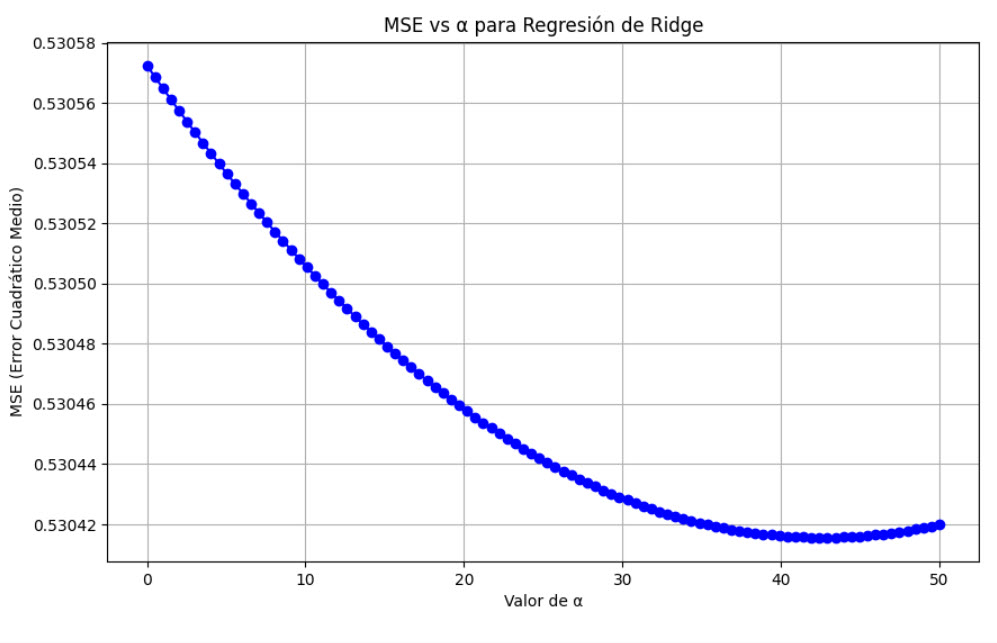